### 1.背景及需求：
#### 1912年4月14日23时40分左右，泰坦尼克号与一座冰山相撞，造成右舷船艏至船中部破裂，五座水密舱进水。次日凌晨2时20分左右，泰坦尼克船体断裂成两截后沉入大西洋底3700米处。2224名船员及乘客中，逾1500人丧生。本项目分析各因素对生还率的影响，主要是不同性别的生还机率，不同等级船舱生还机率，以及不同年龄段生还机率。样本数据来自Kaggle2，该样本中891名乘客的基本信息，来自泰坦尼克号上2224名乘客和船员。


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#基本数据信息
user_data_df = pd.read_csv('titanic-data.csv')
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 2.数据清理
#### 从样本基础信息来看，其中Age和Cabin数据存在缺失情况，数据需要做特殊处理，而且得到的结果可能会存在误差。

In [33]:
#Cabin信息缺失较多，所以本次分析不对cabin信息进行调查，所以cabin信息不做处理
#Age信息有确实，为了反映真实数据，所以对Age信息调查时，去了age信息为空的数据，所以age信息调果的实际数据仅为714

survived_age = user_data_df[user_data_df.Survived == 1]['Age'].dropna()

### 3.数据分析

In [34]:
#总体生还率
user_data_df['Survived'].mean()

0.3838383838383838

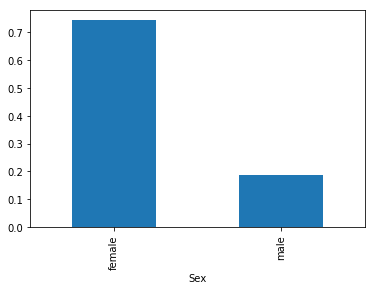

In [35]:
#男性女性生还率
user_data_df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.show()

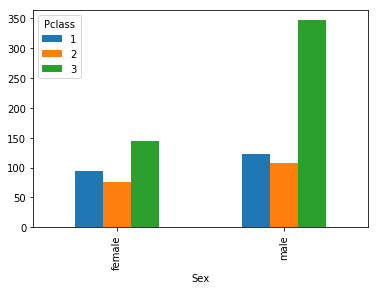

In [36]:
#不同仓位男女比例
#该分析确保女性生还机率大并不是因为女性人数占比重
sex_pclass = user_data_df.groupby(['Sex','Pclass'])['PassengerId'].count().unstack().plot(kind='bar')
plt.show()


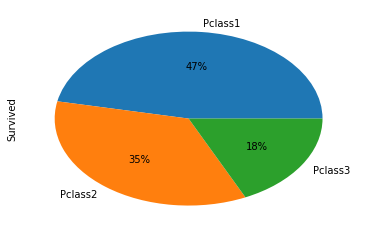

In [37]:
#不同等级仓位生还率
survived_pclass = user_data_df.groupby('Pclass')['Survived'].mean()
#print survived_pclass
survived_pclass.plot(kind='pie',autopct='%.0f%%',labels=['Pclass1','Pclass2','Pclass3'])

plt.show()

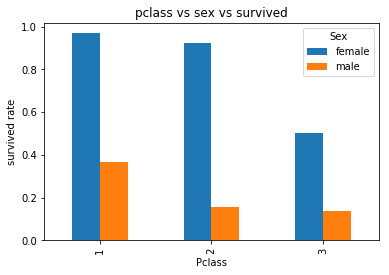

In [38]:
#不同等级仓位男性女性生还机率
survived_sex_pclass = user_data_df[user_data_df.Survived == 1].groupby(['Sex','Pclass'])['PassengerId'].count()

user_data_df.groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('pclass vs sex vs survived')
plt.ylabel('survived rate')
plt.show()



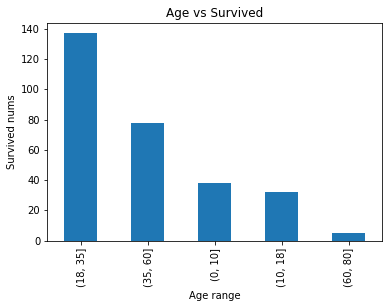

In [39]:
#不同年龄段生还机率
#survived_age = user_data_df[user_data_df.Survived == 1]['Age'].dropna()
#print survived_age
bins=[0, 10, 18, 35, 60 , 80]
#print survived_age
survived_age_rate = pd.cut(survived_age, bins).value_counts()

survived_age_rate_chart = survived_age_rate.plot(kind='bar')
survived_age_rate_chart.set_title('Age vs Survived')
survived_age_rate_chart.set_ylabel('Survived nums')
survived_age_rate_chart.set_xlabel('Age range')

plt.show()


### 总结：
1.整体生还率为38.38% ,很低呀。

2.女性的生还机率高于男性，排除绅士礼让妇孺外，也有可能是女性在极端情况下生存时间更久一些，为了种族延续。

3.不同等级船舱生还机率差别很大，1等舱>2等舱>3等舱，这里有一点需要排除的是，并不是1等舱有什么特权，因该是船是装上冰山，猜测应该是底部首进水
这样1，2等舱的人就有时间逃生。

4.因为年龄有缺失，不过根据数据显示来看，青壮年生还机率最大，其次是幼儿。而10-18段的青年人生还机率低，我猜测可能是因为初生牛犊不怕虎，再加上
遇危经验不足，所以很容易挂掉。最后是老年人，群体行动不便，身体等因素造成生还机率很小。

#### 限制：
1.此样本数据只是2241中的891个，虽然不是全部数据，但样本量己达到总量的40%,但可以反应一个较大概率的可能性。

2.样本中Cabin信息确实较多，该信息是否对生还机率有较大影响，本次分析未做验证。

3.后续还可以继续探索：家庭成员、登船港口等对生成机率的影响，其中最有可能的就是，如果父母跟子女一起乘船的话，是不是生还机率较大。

4.该样本中没有反应出所有人员是船员还是乘客，所以无法判断是否船员有更大的生还机率，这个是很重要的线索，待验证。

5.分析过程中，去掉了age信息为空的数据，实际数据为714，这个可能会对真实结果集产生影响。



### 参考：
https://baike.baidu.com/item/泰坦尼克号/5677